MEG/EEG analysis: Sensor space analysis
================================================


`

For this  session  MNE software will be used: https://mne.tools
To install MNE-Python and nilearn:

`pip install --user mne`

`pip install --user nilearn`

In [17]:
# add plot inline in the page
%matplotlib inline
import numpy as np

import mne
import nilearn

make sure that the data is available, else we will download it:

In [18]:
import os
from mne.datasets import sample
# data_path = '/tsi/doctorants/data_gramfort/data_advneuro/'
data_path = None  # USE THIS LINE IF YOU ARE NOT ON THE TELECOM NETWORK
data_path = sample.data_path(data_path)
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'
print(raw_fname)

C:\Users\God Y\mne_data\MNE-sample-data/MEG/sample/sample_audvis_raw.fif


- Explore the content of this folder.
- Anatomical data are in the `subjects` folder
- MEG data are in the `MEG` folder
- Visualize the file `subjects/sample/mri/T1.mgz` with nilearn [plot_anat](https://nilearn.github.io/modules/generated/nilearn.plotting.plot_anat.html#nilearn.plotting.plot_anat) function.


Here we can see contrast between brain soft tissue and the skull below.


D:\Anaconda\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
D:\Anaconda\lib\site-packages\nilearn\image\resampling.py:510: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


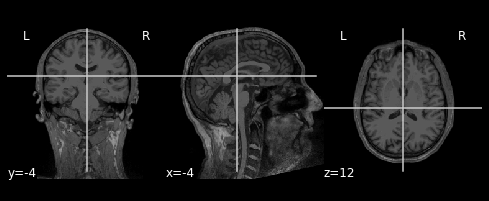

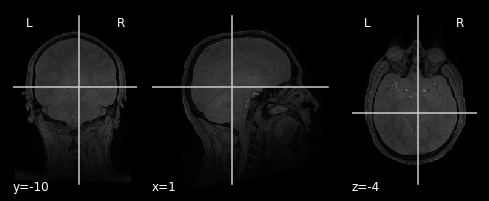

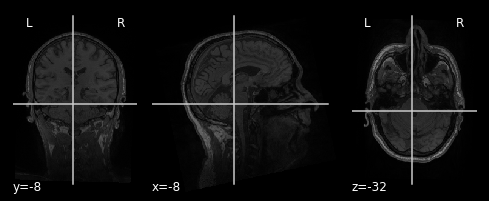

In [19]:
from nilearn.plotting import plot_anat

t1_fname = data_path + '/subjects/sample/mri/T1.mgz'
mef05_fname = data_path + '/subjects/sample/mri/flash/mef05.mgz'
mef30_fname = data_path + '/subjects/sample/mri/flash/mef30.mgz'
plot_anat(t1_fname)
plot_anat(mef05_fname)
plot_anat(mef30_fname)

# Data analysis

Set the log-level to 'WARNING' here so the output is less verbose

In [20]:
mne.set_log_level('WARNING')

## Accessing raw data

Now import the sample dataset.

In [32]:
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'
print(raw_fname)

C:\Users\God Y\mne_data\MNE-sample-data/MEG/sample/sample_audvis_raw.fif


In [22]:
print(raw_fname)

C:\Users\God Y\mne_data\MNE-sample-data/MEG/sample/sample_audvis_raw.fif


Read data from file:

In [34]:
# raw = mne.io.read_raw_fif(raw_fname)
# print(raw)
raw = mne.io.read_raw_fif(raw_fname)
print(raw)

<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 166800 (277.7 sec), ~3.6 MB, data not loaded>



Visualize the file with `raw.plot()`. 


<IPython.core.display.Javascript object>


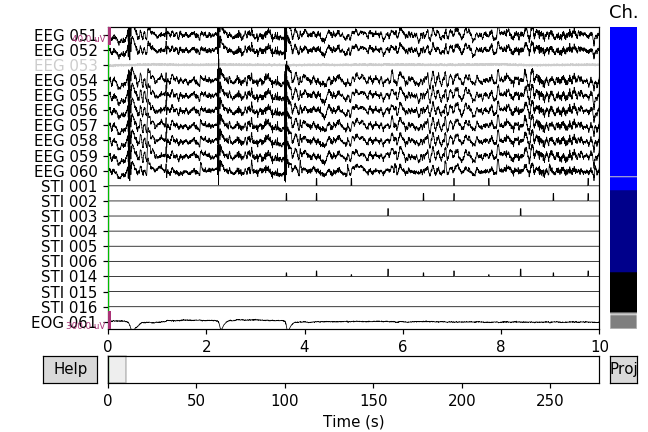

In [71]:
%matplotlib notebook
raw.plot();


Exploring the meta data stored in the info attribute `raw.info` report

In [35]:
%matplotlib inline
print(raw.info)

<Info | 24 non-empty fields
    acq_pars : str | 13886 items
    bads : list | MEG 2443, EEG 053
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (GRAD: 204, MAG: 102, STIM: 9, EEG: 60, EOG: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 49 items
    dev_head_t : Transform | 3 items
    dig : Digitization | 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
    events : list | 1 items
    experimenter : str | 3 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 172.17630004882812 Hz
    meas_date : tuple | 2002-12-03 19:01:10 GMT
    meas_id : dict | 4 items
    nchan : int | 376
    proc_history : list | 0 items
    proj_id : ndarray | 1 items
    proj_name : str | 4 items
    projs : list | PCA-v1: off, PCA-v2: off, PCA-v3: off
    sfreq : float | 600.614990234375 Hz
    acq_s

Let's now access the data:

In [28]:
data, times = raw[:, :10]  # access all channels for the first 10 samples
print(data.shape)

(376, 10)


Read a segment of raw data

In [29]:
start, stop = raw.time_as_index([100, 115])  # 100 s to 115 s data segment
data, times = raw[:306, start:stop]
print(data.shape)
print(times.shape)
print(times.min(), times.max())

(306, 9009)
(9009,)
99.99916914588277 114.99712981363909




- Using the `mne.pick_types` command extract the indices of the EEG channels and plot them all for the 10 first seconds using matplotlib.
- Do the same for the 3 types of channels.

In [37]:
picks_eeg = mne.pick_types(raw.info,meg=False,eeg=True)
picks_grad = mne.pick_types(raw.info,meg='grad')
picks_mag = mne.pick_types(raw.info,meg='mag')

In [38]:
start, stop = raw.time_as_index([0, 10])  # 0 s to 10 s data segment
data_eeg, times = raw[picks_eeg, start:stop]
data_grad, times = raw[picks_grad, start:stop]
data_mag, times = raw[picks_mag, start:stop]

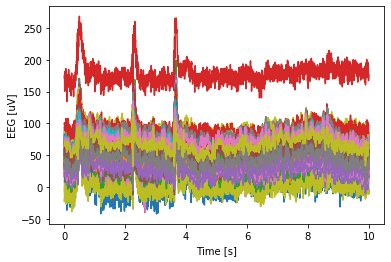

In [43]:
import matplotlib.pyplot as plt

plt.plot(times, 1e6 * data_eeg.T);
plt.xlabel('Time [s]');
plt.ylabel('EEG [uV]');


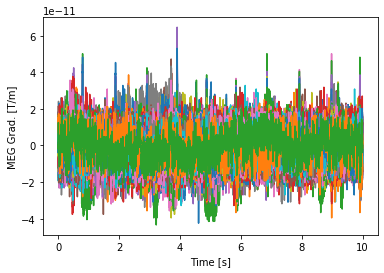

In [44]:
plt.plot(times, data_grad.T);
plt.xlabel('Time [s]');
plt.ylabel('MEG Grad. [T/m]');


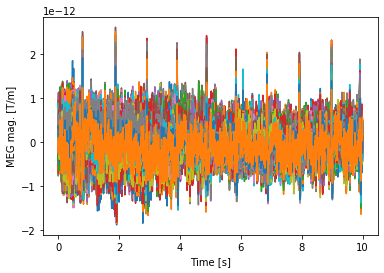

In [45]:
plt.plot(times, data_mag.T);
plt.xlabel('Time [s]');
plt.ylabel('MEG mag. [T/m]');

## Define and read epochs

First extract events:

In [46]:
events = mne.find_events(raw, stim_channel='STI 014')
(events[:,2] == 1).sum()

72

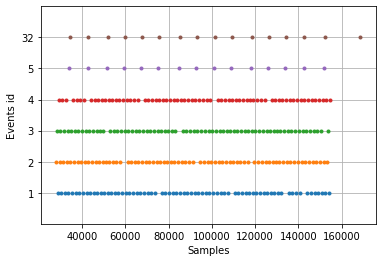

In [47]:
mne.viz.plot_events(events);


- plot the events and the experimental paradigm with the `mne.viz.plot_events` function.

We will now define epochs parameters:

In [48]:
event_id = dict(aud_l=1, aud_r=2)  # event trigger and conditions
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.5  # end of each epoch (500ms after the trigger)

In [49]:
event_id

{'aud_l': 1, 'aud_r': 2}

Pick the good channels:

In [50]:
picks = mne.pick_types(raw.info, meg=True, eeg=True, eog=True,
                       stim=False, exclude='bads')

Define the baseline period:

In [51]:
baseline = (None, 0)  # means from the first instant to t = 0

Define peak-to-peak rejection parameters for gradiometers, magnetometers and EOG:

In [52]:
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)

Read epochs:

In [53]:
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=picks, baseline=baseline, reject=reject)

See what channels contribute to epochs rejection:

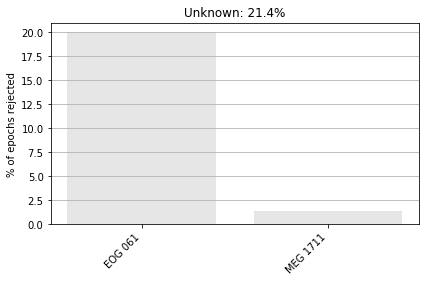

In [54]:
epochs.drop_bad()
epochs.plot_drop_log();

To save the epochs to disk just use:

In [55]:
epochs.save('sample-epo.fif')

Loading data for 1 events and 421 original time points ...
Loading data for 114 events and 421 original time points ...


<ipython-input-55-3711aaadc051>:1: DeprecationWarning: overwrite defaults to True in 0.18 but will change to False in 0.19, set it explicitly to avoid this warning
  epochs.save('sample-epo.fif')


### Average the epochs to get ERF/ERP



- Using the `epochs.average` method define a new variable you will call evoked that contains the event related brain response.
- Plot the evoked data with `evoked.plot()`
- Using the evoked.plot_topomap method plot the topographies for MEG magnetometers, MEG gradiometers and EEG.


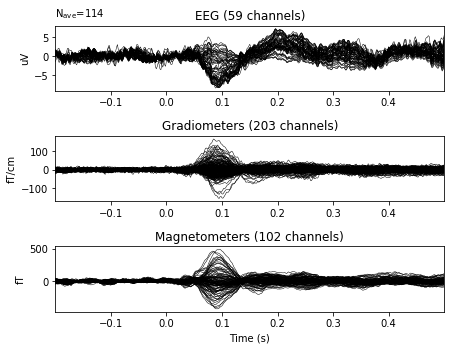

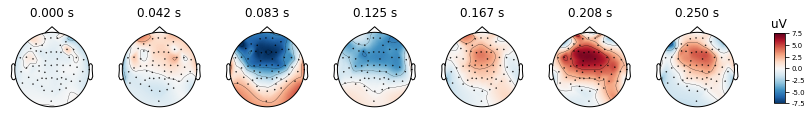

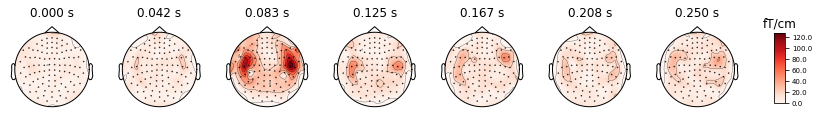

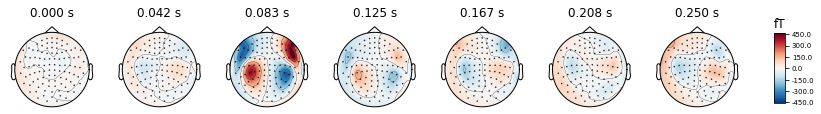

In [56]:
evoked = epochs.average()
evoked.plot();
times = np.linspace(0, 0.25, 7)
evoked.plot_topomap(ch_type = 'eeg', times=times);
evoked.plot_topomap(ch_type = 'grad', times=times);
evoked.plot_topomap(ch_type = 'mag', times=times);


- Recompute epochs and evoked after filtering the data with a highpass at 1Hz and not using any baseline.
- Reduce the number of epochs in the average. And try average only 3 epochs, what do you see on the gradiometers evoked data?
- Add ECG projections to raw with raw.add_proj. 

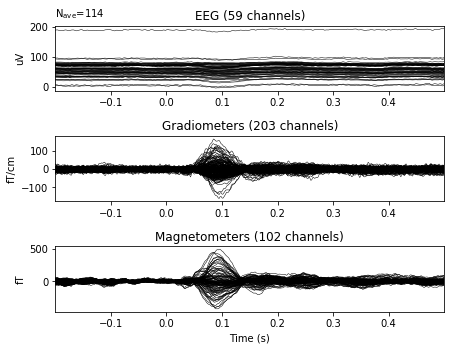

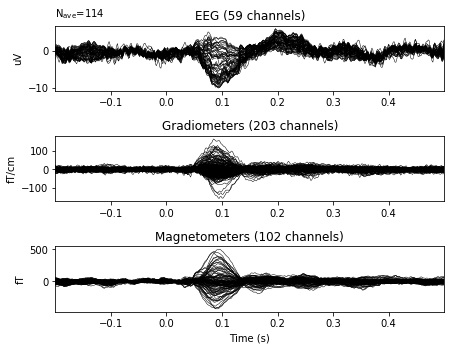

In [57]:
raw=raw.load_data();
epochs_no_baseline = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=picks, reject=reject , baseline=None)
evoked = epochs_no_baseline.average()
evoked.plot();

#raw.load
raw2=raw.load_data();
raw2=raw2.filter(1,None);
epochs_hp_filter = mne.Epochs(raw2, events, event_id, tmin, tmax, proj=True,
                    picks=picks, reject=reject , baseline=None)
evoked = epochs_hp_filter.average()
evoked.plot();

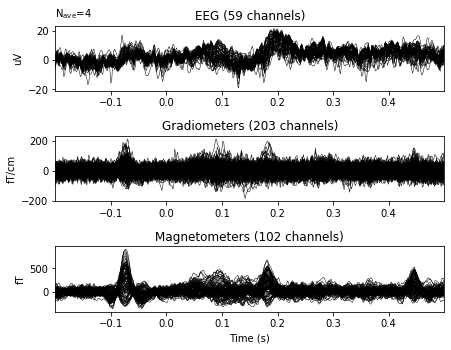

In [58]:
evoked = epochs[0:4].average()
evoked.plot();